# Prédiction du Type de Végétation Forestière

In [1]:
import os
import warnings

import numpy as np
import pandas as pd
import scipy
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from sklearn.metrics import make_scorer, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

In [2]:
# Importation des jeux de données (à personnaliser)
df_train = pd.read_csv(r".\Data\train.csv")
df_test = pd.read_csv(r".\Data\test.csv")

# I. Analyse des données

## A. Première approche

In [3]:
df_train

,Unnamed: 0,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,0,2909,28,18,182,58,1350,210,197,117,...,0,0,0,0,0,0,0,0,0,2
1,1,2757,334,30,212,83,1384,137,184,177,...,0,0,0,0,0,0,0,0,0,2
2,2,3283,248,4,150,15,5601,211,243,170,...,0,0,0,0,0,0,1,0,0,1
3,3,3019,330,14,541,-101,1811,186,222,175,...,0,0,0,0,0,0,0,0,0,2
4,4,3039,340,20,474,74,3407,175,207,169,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,2521,187,17,30,1,1099,220,250,158,...,0,0,0,0,0,0,0,0,0,6
99996,99996,2891,341,16,30,9,3774,186,215,167,...,0,0,0,0,0,0,0,0,0,2
99997,99997,2563,129,9,134,18,569,236,235,129,...,0,0,0,0,0,0,0,0,0,2
99998,99998,3322,238,14,153,32,2773,195,251,192,...,0,0,0,0,0,0,0,0,0,1


In [4]:
df_test

,row_ID,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,0,2767,66,17,210,18,1190,234,204,96,...,1,0,0,0,0,0,0,0,0,0
1,1,2724,160,19,60,4,1350,236,240,127,...,0,0,0,0,0,0,0,0,0,0
2,2,2360,65,7,127,21,1377,227,226,134,...,0,0,0,0,0,0,0,0,0,0
3,3,2995,45,4,285,30,5125,221,231,146,...,0,0,0,0,0,0,0,0,0,0
4,4,2400,106,27,150,63,342,253,196,51,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481007,481007,3185,153,13,162,25,3695,235,240,134,...,0,1,0,0,0,0,0,0,0,0
481008,481008,3158,212,21,170,24,691,197,254,186,...,0,0,0,0,0,0,0,0,0,0
481009,481009,3125,358,22,912,358,1050,182,195,147,...,0,0,1,0,0,0,0,0,0,0
481010,481010,2201,324,30,67,50,685,132,193,193,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df_train.dtypes

Unnamed: 0                            int64
Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area1                      int64
Wilderness_Area2                      int64
Wilderness_Area3                      int64
Wilderness_Area4                      int64
Soil_Type1                            int64
Soil_Type2                            int64
Soil_Type3                            int64
Soil_Type4                            int64
Soil_Type5                            int64
Soil_Type6                            int64
Soil_Type7                            int64
Soil_Type8                      

Nous changeons le type de la variable réponse pour quelle soit au format category

In [6]:
df_train['Cover_Type'] = df_train['Cover_Type'].astype('category')

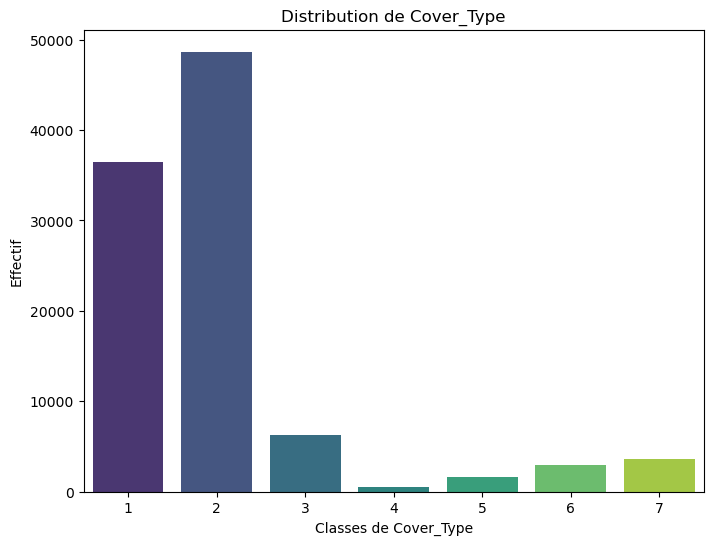

In [7]:
# Répartition des classes de notre variable cible
warnings.simplefilter(action='ignore', category=FutureWarning)

plt.figure(figsize=(8, 6))
sns.countplot(data=df_train, x='Cover_Type', palette='viridis')
plt.title('Distribution de Cover_Type')
plt.xlabel('Classes de Cover_Type')
plt.ylabel('Effectif')
plt.show()

In [8]:
# Compter les occurrences de chaque classe dans Cover_Type
counts = df_train['Cover_Type'].value_counts()

print(counts)

Cover_Type
2    48676
1    36410
3     6273
7     3568
6     2967
5     1635
4      471
Name: count, dtype: int64


Nous observons y a un déséquilibre marqué dans la répartition des classes.

## B. Analyse des données

### Variable Soil_Type15

In [9]:
df_test[df_test['Soil_Type15'] != 0]

,row_ID,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
12194,12194,2078,34,10,0,0,212,219,218,134,...,0,0,0,0,0,0,0,0,0,0
197339,197339,2076,27,24,30,5,175,201,180,105,...,0,0,0,0,0,0,0,0,0,0
399673,399673,2080,13,19,30,0,192,198,197,132,...,0,0,0,0,0,0,0,0,0,0


Cette variable est beaucoup trop déséquilibré, elle n'apporte donc pas d'information.

### Corrélation linéaire entre les variables

In [10]:
df_X = df_train.drop('Unnamed: 0', axis=1)
df_X = df_X.drop('Cover_Type', axis=1)
df_Y = df_train['Cover_Type']

In [11]:
quanti = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 
          'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 
          'Horizontal_Distance_To_Fire_Points']

quali = ['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40']

for i, colonne in enumerate(quali):
    df_train[colonne] = df_train[colonne].astype('category')
    df_test[colonne] = df_test[colonne].astype('category')

# One-hot-encoding
data_train = pd.get_dummies(df_train, columns=quali, drop_first=True)
data_test = pd.get_dummies(df_test, columns=quali, drop_first=True)

In [12]:
data_quanti = df_train.drop(columns=quali)

warnings.filterwarnings("ignore", category=RuntimeWarning)

corr = df_train.corr() # matrice des corrélations
corr.style.background_gradient(cmap='viridis')

,Unnamed: 0,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
Unnamed: 0,1.000000,0.004048,-0.002273,0.005747,0.005324,0.003430,0.003384,0.001073,-0.001795,-0.003046,0.004316,-0.000248,-0.002565,0.000180,0.002437,-0.002177,-0.001759,-0.003468,-0.002389,-0.000438,-0.000912,-0.003258,-0.001301,0.003529,0.003915,-0.001320,-0.000732,0.001633,-0.002745,nan,-0.002859,-0.006149,0.000597,-0.000000,0.000647,-0.006524,-0.001901,0.001448,0.001946,-0.002001,-0.002278,0.002257,-0.000324,-0.001060,-0.003561,0.000168,-0.000780,0.006897,-0.000359,-0.001394,-0.002784,0.001522,-0.001267,0.003537,0.001394,-0.002710
Elevation,0.004048,1.000000,0.013877,-0.242042,0.309370,0.096220,0.367561,0.113242,0.202918,0.056590,0.151327,0.134528,0.237896,0.067596,-0.621748,-0.203014,-0.189764,-0.184831,-0.185147,-0.149211,-0.211167,-0.002082,-0.003266,-0.061650,-0.433041,-0.134558,-0.118288,-0.043914,-0.080887,nan,-0.057187,-0.108918,-0.081491,0.032948,-0.042824,0.016570,0.154791,0.124758,0.053177,0.027593,-0.014836,0.036866,-0.026965,0.077140,-0.029367,0.070779,0.165192,0.070190,0.012399,0.080240,0.020223,0.036815,0.221121,0.194497,0.215149,-0.267913
Aspect,-0.002273,0.013877,1.000000,0.080103,0.019330,0.072632,0.022079,-0.580137,0.339373,0.647162,-0.112210,-0.145343,0.057711,0.078969,0.083007,-0.012389,-0.002387,-0.001567,0.017747,0.008681,0.009977,-0.007052,-0.005697,-0.019286,0.050618,-0.062289,-0.066470,0.056116,0.006595,nan,0.006444,0.001940,-0.027742,-0.004976,-0.029871,0.032601,0.022264,0.010910,0.022547,-0.003240,-0.014122,0.012305,0.026333,-0.068058,-0.027353,0.000602,0.054459,0.026792,0.011648,-0.018571,0.002259,-0.020879,0.015437,0.006904,-0.009814,0.019812
Slope,0.005747,-0.242042,0.080103,1.000000,-0.013196,0.274509,-0.216689,-0.327371,-0.522700,-0.172683,-0.188198,-0.238923,-0.031857,0.127536,0.254616,0.107228,-0.017599,0.128507,0.130312,0.069810,0.002529,-0.014424,-0.025378,-0.034167,0.239940,-0.049940,-0.175667,0.199782,-0.002034,nan,-0.035253,-0.040072,-0.044265,-0.082605,-0.079274,-0.025450,-0.055484,-0.203651,0.081929,0.025189,-0.021086,0.039740,0.065740,-0.082033,0.075953,-0.035621,-0.136024,0.212216,-0.008707,-0.020429,0.004855,0.005748,-0.074018,0.095305,0.022853,0.148695
Horizontal_Distance_To_Hydrology,0.005324,0.309370,0.019330,-0.013196,1.000000,0.608796,0.073970,-0.030650,0.047994,0.056564,0.056925,-0.097631,0.057944,0.122956,-0.102477,-0.036215,-0.012873,-0.043776,-0.054410,-0.011419,-0.013987,0.004869,-0.003768,-0.025889,-0.072829,0.000503,0.017266,-0.002512,-0.039618,nan,-0.066080,-0.071516,-0.012686,-0.043333,-0.076903,-0.039390,-0.053388,-0.126781,0.020674,0.017721,0.013720,0.055267,0.026917,-0.002191,-0.054290,0.071959,0.126354,0.102324,0.072285,-0.007448,0.030175,-0.007218,0.047684,0.031937,0.152584,-0.022724
Vertical_Distance_To_Hydrology,0.003430,0.096220,0.072632,0.274509,0.608796,1.000000,-0.047514,-0.169012,-0.110981,0.037877,-0.069849,-0.184317,-0.009986,0.151428,0.076338,0.016327,0.007955,0.005656,0.016924,0.024803,0.046593,-0.007789,-0.014206,-0.029427,0.051276,-0.021187,-0.043141,0.086850,-0.025228,nan,-0.050834,-0.054548,-0.032014,-0.055341,-0.075823,-0.026083,-0.076021,-0.177850,0.036269,-0.022546,-0.010474,0.069245,0.076299,-0.079683,-0.013994,0.036648,0.038863,0.170326,0.060706,-0.009745,0.012984,-0.008573,-0.006533,0.045637,0.1

Conclusion :

- Soil_type_15 n'apporte aucune info
- Pas de corrélation linéaire entre la variable d'intérêt (cover_type) et les autres variables

Nous allons donc chercher à utiliser des modèles non linéaire comme la random forest, le gradient boosting ou encore les K plus proche voisin.

# II. Modèles

In [13]:
def crossval_f1_weighted(model, X, y, fold=5, scorer=make_scorer(f1_score, average="weighted")):
    """
    Effectue une validation croisée pour évaluer un modèle de classification en utilisant le score F1 pondéré.

    Parameters
    ----------
    model : sklearn.base.BaseEstimator
        Le modèle de classification à évaluer.
    X : array-like ou pandas.DataFrame, shape (n_samples, n_features)
        Les données d'entrée contenant les caractéristiques (*features*).
    y : array-like ou pandas.Series, shape (n_samples,)
        Les labels ou cibles associées aux données d'entrée.
    fold : int, optional, default=5
        Le nombre de folds pour la validation croisée.
    scorer : callable, optional, default=make_scorer(f1_score, average="weighted")
        La métrique de scoring utilisée pour évaluer les performances. Par défaut, le score F1 pondéré.

    Returns
    -------
    None
        La fonction affiche les scores F1 pondérés pour chaque fold et leur moyenne.
    """
    cv_scores = cross_val_score(model, X, y, cv=fold, scoring=scorer, n_jobs=-1)

    print("F1-score pondéré pour chaque fold:", cv_scores)
    print("F1-score pondéré moyen:", cv_scores.mean())

In [14]:
def train_and_predict(model, X_train, y_train, X_test):
    """
    Entraîne un modèle de classification sur des données d'entraînement et génère des prédictions 
    sur un jeu de données de test.

    Parameters
    ----------
    model : sklearn.base.BaseEstimator
        Le modèle de classification à entraîner. Doit implémenter les méthodes `fit` et `predict`.
    X_train : array-like ou pandas.DataFrame, shape (n_samples, n_features)
        Les données d'entrée utilisées pour l'entraînement du modèle.
    y_train : array-like ou pandas.Series, shape (n_samples,)
        Les labels ou cibles associés aux données d'entraînement.
    X_test : array-like ou pandas.DataFrame, shape (n_samples_test, n_features)
        Les données d'entrée sur lesquelles effectuer les prédictions.

    Returns
    -------
    prediction_df : pandas.DataFrame
        Un DataFrame contenant les prédictions avec les colonnes suivantes :
        - `row_ID` : L'indice des échantillons dans le jeu de test.
        - `Cover_Type` : Les prédictions du modèle pour chaque échantillon.

    """
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    predictions_df = pd.DataFrame({'Cover_Type': y_pred})
    predictions_df['row_ID'] = predictions_df.index
    predictions_df = predictions_df[['row_ID', 'Cover_Type']]
    
    return predictions_df

### Jeu de données complet

In [ ]:
data_train = data_train.drop('Cover_Type', axis=1) 
data_train = data_train.drop('Unnamed: 0', axis=1) 

data_test = data_test.drop('Soil_Type15_1', axis=1) 
data_test = data_test.drop('row_ID', axis=1)

quanti = data_train.select_dtypes(include=['int64']).columns.tolist()
quali = data_train.select_dtypes(include=['bool']).columns.tolist()

## A. K Nearest Neighbor

Cette méthode à besoin d'avoir des données normalisées et standardisées pour obtenir de meilleurs résultats, contrairement aux méthodes d'arbres.

### Recherche des meilleurs hyperparamètres

In [ ]:
# Colonnes quantitatives et qualitatives
quanti = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 
          'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 
          'Horizontal_Distance_To_Fire_Points']
quali = ['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40']

# Séparation X et Y
df_X = df_train.drop('Cover_Type', axis=1) #df_train à personnaliser
df_Y = df_train['Cover_Type']

# Pipeline de prétraitement
preprocessor = ColumnTransformer(transformers=[('num', StandardScaler(), quanti),
                                               ('cat', OneHotEncoder(), quali)])

# Pipeline complet avec k-NN
pipeline = Pipeline([('preprocessor', preprocessor),
                     ('knn', KNeighborsClassifier())])

param_distributions = {'knn__n_neighbors': np.arange(3, 21, 2),
                       'knn__weights': ['uniform', 'distance'],
                       'knn__metric': ['euclidean', 'manhattan', 'minkowski'],
                       'knn__class_weight': ['balanced']}

# RandomizedSearchCV avec F1-score
random_search = RandomizedSearchCV(estimator=pipeline,
                                   param_distributions=param_distributions,
                                   n_iter=100,
                                   scoring=make_scorer(f1_score, average='weighted'),
                                   cv=5,
                                   verbose=1,
                                   n_jobs=-1,
                                   random_state=123)

random_search.fit(df_X, df_Y)

print("Meilleurs paramètres : ", random_search.best_params_)
print("Meilleur score F1 : ", random_search.best_score_)

### F1-Score en Cross Validation

In [105]:
# Pipeline de prétraitement
preprocessor = ColumnTransformer(transformers=[('num', StandardScaler(), quanti)])

# Pipeline complet avec k-NN et les meilleurs paramètres obtenus après la grid search
pipeline = Pipeline([('preprocessor', preprocessor),
                     ('knn', KNeighborsClassifier(weights='distance', n_neighbors=np.int64(3), metric='minkowski'))])

f1 = cross_val_score(pipeline, data_train, df_Y, cv=5, scoring=make_scorer(f1_score, average='weighted'))

crossval_f1_weighted(pipeline, data_train, df_Y, fold=5)

F1-score pondéré pour chaque fold: [0.83491953 0.83701407 0.83537991 0.84388135 0.83788993]
F1-score pondéré moyen: 0.8378169568463271


### F1-Score public

In [18]:
preprocessor = ColumnTransformer(transformers=[('num', StandardScaler(), quanti), ('cat', 'passthrough', quali)])

# Pipeline principal
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

data_train_transformed = pipeline.fit_transform(data_train)
data_test_transformed = pipeline.transform(data_test)

# Récupération des noms de colonnes après transformation
all_columns = quanti + quali
data_train_transformed = pd.DataFrame(data_train_transformed, columns=all_columns, index=data_train.index)
data_test_transformed = pd.DataFrame(data_test_transformed, columns=all_columns, index=data_test.index)

In [19]:
knn = KNeighborsClassifier(weights='distance', n_neighbors=np.int64(3), metric='minkowski')
predictions_df = train_and_predict(knn, data_train_transformed, df_Y, data_test_transformed)
predictions_df

,row_ID,Cover_Type
0,0,2
1,1,2
2,2,3
3,3,2
4,4,3
...,...,...
481007,481007,2
481008,481008,2
481009,481009,2
481010,481010,3


In [110]:
# Exporter le DataFrame vers un fichier CSV
# output_path = a personnaliser
predictions_df.to_csv(output_path, index=False, header=True)

#### Résultats

> - Jeu de données : toutes les variables
> - f1-score : 0.8378169568463271
> - f1-score public : 0.88728

## B. Random Forest

### Choix de variables

On cherche à réduire les dimensions grâce au calcul des importances.

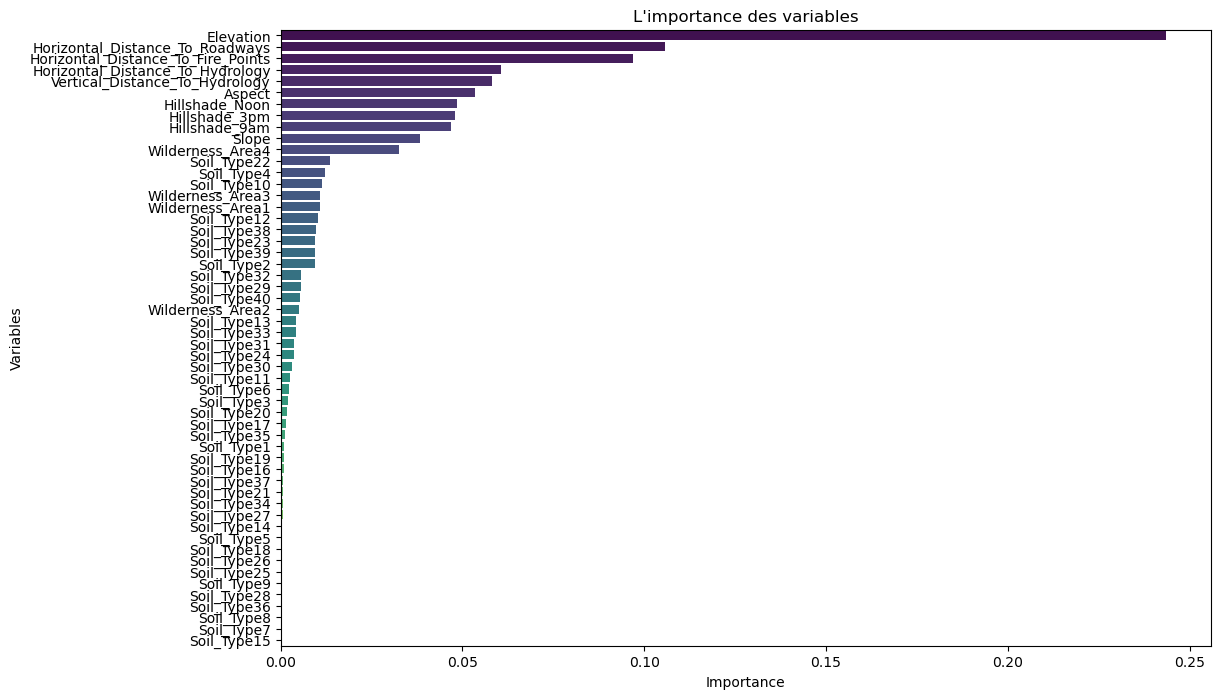

In [21]:
rf_model = RandomForestClassifier(random_state=123)
rf_model.fit(df_X, df_Y)

# Importance des caractéristiques
var_importances = rf_model.feature_importances_
var = df_X.columns

# DataFrame pour trier les importances des variables
var_importances_df = pd.DataFrame({'variables': var, 'importance': var_importances}).sort_values(by='importance', 
                                                                                                 ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='variables', data=var_importances_df, palette="viridis")
plt.title("L'importance des variables")
plt.xlabel("Importance")
plt.ylabel("Variables")
plt.show()

In [25]:
importance_min = var_importances_df[var_importances_df['variables'] == 'Soil_Type2']['importance'].values[0]

# Filtre les variables dont l'importance est >= à celle de Soil_Type2
var_selec = var_importances_df[var_importances_df['importance'] >= importance_min]['variables']

df_X_selected = df_X[var_selec] # Variables sélectionnées

print(f"Les variables sélectionnées sont : {var_selec}")

Les variables sélectionnées sont : 0                              Elevation
5        Horizontal_Distance_To_Roadways
9     Horizontal_Distance_To_Fire_Points
3       Horizontal_Distance_To_Hydrology
4         Vertical_Distance_To_Hydrology
1                                 Aspect
7                         Hillshade_Noon
8                          Hillshade_3pm
6                          Hillshade_9am
2                                  Slope
13                      Wilderness_Area4
35                           Soil_Type22
17                            Soil_Type4
23                           Soil_Type10
12                      Wilderness_Area3
10                      Wilderness_Area1
25                           Soil_Type12
51                           Soil_Type38
36                           Soil_Type23
52                           Soil_Type39
15                            Soil_Type2
Name: variables, dtype: object


In [24]:
crossval_f1_weighted(rf_model, df_X_selected, df_Y, fold=5)

F1-score pondéré pour chaque fold: [0.89556867 0.89200892 0.89375    0.89822757 0.89140333]
F1-score pondéré moyen: 0.8941916998780803


Le score reste dans le même ordre de grandeur, avec une forte réduction de dimension (21 variables restantes).

On cherche à présent à optimiser les hyperparamètres.

### Recherche d'hyperparamètres

In [ ]:
# Grille d'hyperparamètres
param_distributions = {'n_estimators': [200, 500, 700],
                       'max_depth': [5,10, 15, 20,25],
                       'min_samples_split': [2, 3, 5, 10],
                       'min_samples_leaf': [1, 2, 4],
                       'max_features': ['sqrt'],
                       'class_weight': ['balanced']}

f1_weighted_scorer = make_scorer(f1_score, average="weighted")

# RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf_model,
                                   param_distributions=param_distributions,
                                   scoring=f1_weighted_scorer,
                                   cv=5,
                                   n_iter=50,
                                   n_jobs=-1,
                                   random_state=123)

random_search.fit(df_X_selected, df_Y)

best_params = random_search.best_params_
print("Meilleurs paramètres trouvés:", best_params)

c:\Users\alexa\OneDrive\Documents\UNIVERSITE\Master2_MIA\supervisé\compétition\env\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Meilleurs paramètres trouvés: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 25, 'class_weight': 'balanced'}


### F1-Score en cross validation

In [27]:
rf_model = RandomForestClassifier(n_estimators= 500,
                                  min_samples_split=2,
                                  min_samples_leaf=1,
                                  max_features='sqrt',
                                  max_depth=25,
                                  class_weight= 'balanced',
                                  random_state=123) #meilleurs paramètres

crossval_f1_weighted(rf_model, df_X_selected, df_Y, fold = 5)

F1-score pondéré pour chaque fold: [0.89655983 0.89595122 0.89494535 0.89902555 0.8944055 ]
F1-score pondéré moyen: 0.8961774899151012


### F1-Score public

Il faut restreindre df_test aux mêmes variables que df_X_selected.

In [30]:
df_test_selected = df_test[var_selec]
df_X_selected.shape

(100000, 21)

In [ ]:
predictions_df = train_and_predict(rf_model, df_X_selected, df_Y, df_test_selected)
predictions_df

,row_ID,Cover_Type
0,0,2
1,1,2
2,2,3
3,3,2
4,4,3
...,...,...
481007,481007,2
481008,481008,2
481009,481009,2
481010,481010,3


In [76]:
# output_path = a personnaliser
predictions_df.to_csv(output_path, index=False, header=True)

#### Résultats

Paramètres : 'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 25, 'class_weight': 'balanced'

> - Jeu de données : importance de la RF
> - f1-score : 0.8961774899151012
> - f1-score public : 0.90302

## C. Gradient Boosting

### Choix des variables

In [26]:
gb_model = GradientBoostingClassifier(random_state=123)

crossval_f1_weighted(gb_model, df_X, df_Y, fold=5) # jeu de données avec toutes les variables

F1-score pondéré pour chaque fold: [0.77268849 0.76618713 0.76454998 0.77456869 0.76973857]
F1-score pondéré moyen: 0.769546571240628


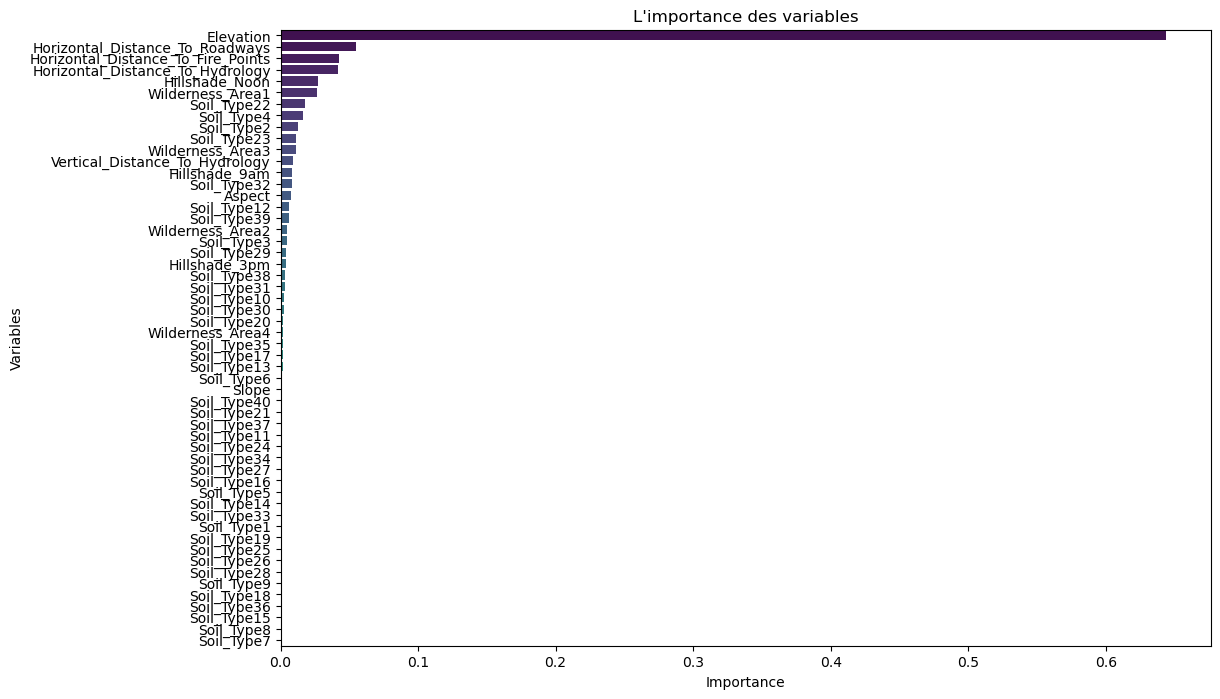

In [27]:
gb_model = GradientBoostingClassifier(random_state=123)
gb_model.fit(df_X, df_Y)

# Importance des caractéristiques
var_importances = gb_model.feature_importances_
var = df_X.columns

# DataFrame pour trier les importances des variables
var_importances_df = pd.DataFrame({'variables': var, 'importance': var_importances}).sort_values(by='importance', 
                                                                                                 ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='variables', data=var_importances_df, palette="viridis")
plt.title("L'importance des variables")
plt.xlabel("Importance")
plt.ylabel("Variables")
plt.show()

In [30]:
importance_min = var_importances_df[var_importances_df['variables'] == 'Soil_Type39']['importance'].values[0]

# Filtrer les variables dont l'importance est >= à celle de Soil_Type39
var_selec = var_importances_df[var_importances_df['importance'] >= importance_min]['variables']

# Variables sélectionnées
df_X_selected_gb = df_X[var_selec]

print(f"Les variables sélectionnées sont : {var_selec}")

Les variables sélectionnées sont : 0                              Elevation
5        Horizontal_Distance_To_Roadways
9     Horizontal_Distance_To_Fire_Points
3       Horizontal_Distance_To_Hydrology
7                         Hillshade_Noon
10                      Wilderness_Area1
35                           Soil_Type22
17                            Soil_Type4
15                            Soil_Type2
36                           Soil_Type23
12                      Wilderness_Area3
4         Vertical_Distance_To_Hydrology
6                          Hillshade_9am
45                           Soil_Type32
1                                 Aspect
25                           Soil_Type12
52                           Soil_Type39
Name: variables, dtype: object


In [39]:
crossval_f1_weighted(gb_model, df_X_selected_gb, df_Y, fold = 5)

F1-score pondéré pour chaque fold: [0.76707753 0.76148011 0.75916982 0.76466635 0.76057819]
F1-score pondéré moyen: 0.7625943997346936


Le score reste dans le même ordre de grandeur, avec une forte réduction de dimension (17 variables restantes).

Comme la recherche d'hyperparamètres était trop longue nous avons conserver les hyperparamètres suivant après quelques test à la main :
- n_estimators= 200
- min_samples_split=2
- min_samples_leaf=1
- max_features='sqrt'
- max_depth= 15
- learning_rate = 0.01 (choisi)
- subsample= 0.7 (choisi)

### F1-Score en cross validation

In [31]:
gb_model = GradientBoostingClassifier(n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', 
                                      max_depth=15, learning_rate=0.01, subsample=0.7, random_state=123)

crossval_f1_weighted(gb_model, df_X_selected_gb, df_Y, fold=5) # variable d'importance

F1-score pondéré pour chaque fold: [0.88400669 0.88425276 0.88138756 0.88849611 0.88426493]
F1-score pondéré moyen: 0.8844816099795949


### F1-Score public

In [32]:
# Sélection des variables dans le jeu de données test
df_test_selected_gb = df_test[var_selec]

In [33]:
predictions_df = train_and_predict(gb_model, df_X_selected_gb, df_Y, df_test_selected_gb)
predictions_df

,row_ID,Cover_Type
0,0,2
1,1,2
2,2,3
3,3,2
4,4,3
...,...,...
481007,481007,2
481008,481008,2
481009,481009,2
481010,481010,3


In [54]:
# output_path = à personnaliser
predictions_df.to_csv(output_path, index=False, header=True)

#### Résultats

Paramètres : 'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 15, 'class_weight': 'balanced', 'learning_rate': 0.01 et 'subsample': 0.7


> - Jeu de données : importance du Gradient Boosting
> - f1-score : 0.8849601441196754
> - f1-score public : 0.89055

## D. Bootstrap

### Rééquilibrage des classes

L'objectif de cette partie est de réaliser des tirages avec remise au sein des lignes des classes minoritaires pour réduire le déséquilibre du nombre de lignes par classe.

Nous ferons ces tests seulement sur le modèle ayant donné les meilleurs résultats (forêt aléatoire)

In [34]:
def resample_classes(df, target_col, min_size):
    """
    Rééchantillonne les classes d'un DataFrame pour garantir une taille minimale par classe cible.

    Parameters
    ----------
    df : pandas.DataFrame
        Le DataFrame contenant les données à rééchantillonner.
    target_col : str
        Le nom de la colonne cible contenant les classes.
    min_size : int
        La taille minimale souhaitée pour chaque classe. Les classes ayant moins d'échantillons que `min_size` 
        seront augmentées par rééchantillonnage avec remplacement (bootstrap).

    Returns
    -------
    df_resampled : pandas.DataFrame
        Un DataFrame où toutes les classes ont au moins `min_size` échantillons. 
        Les classes avec une taille initiale supérieure ou égale à `min_size` restent inchangées.
    """
    resampled_dfs = [] # stocker les dataframes échantillonnés
    
    for class_value, group in df.groupby(target_col):
        if len(group) < min_size:
            # Augmenter la classe avec bootstrap jusqu'à la taille cible
            group_resampled = resample(group, replace=True, n_samples=min_size, random_state=123)
            resampled_dfs.append(group_resampled)
            
        else:
            resampled_dfs.append(group)
    
    # Combiner les classes rééchantillonnées en un seul DataFrame
    df_resampled = pd.concat(resampled_dfs)
    
    return df_resampled

Nous choisissons de fixer le nombre de ligne minimum par classe à 10 000.

In [35]:
df_train = df_train.drop('Unnamed: 0', axis=1)

In [36]:
df_resampled = resample_classes(df_train, 'Cover_Type', 10000)

# Séparer les caractéristiques et la cible après rééchantillonnage
df_X_resampled = df_resampled.drop(columns='Cover_Type')
df_Y_resampled = df_resampled['Cover_Type']

print("Répartition des classes après le rééchantillonnage :")
print(df_Y_resampled.value_counts())

Répartition des classes après le rééchantillonnage :
Cover_Type
2    48676
1    36410
3    10000
4    10000
5    10000
6    10000
7    10000
Name: count, dtype: int64


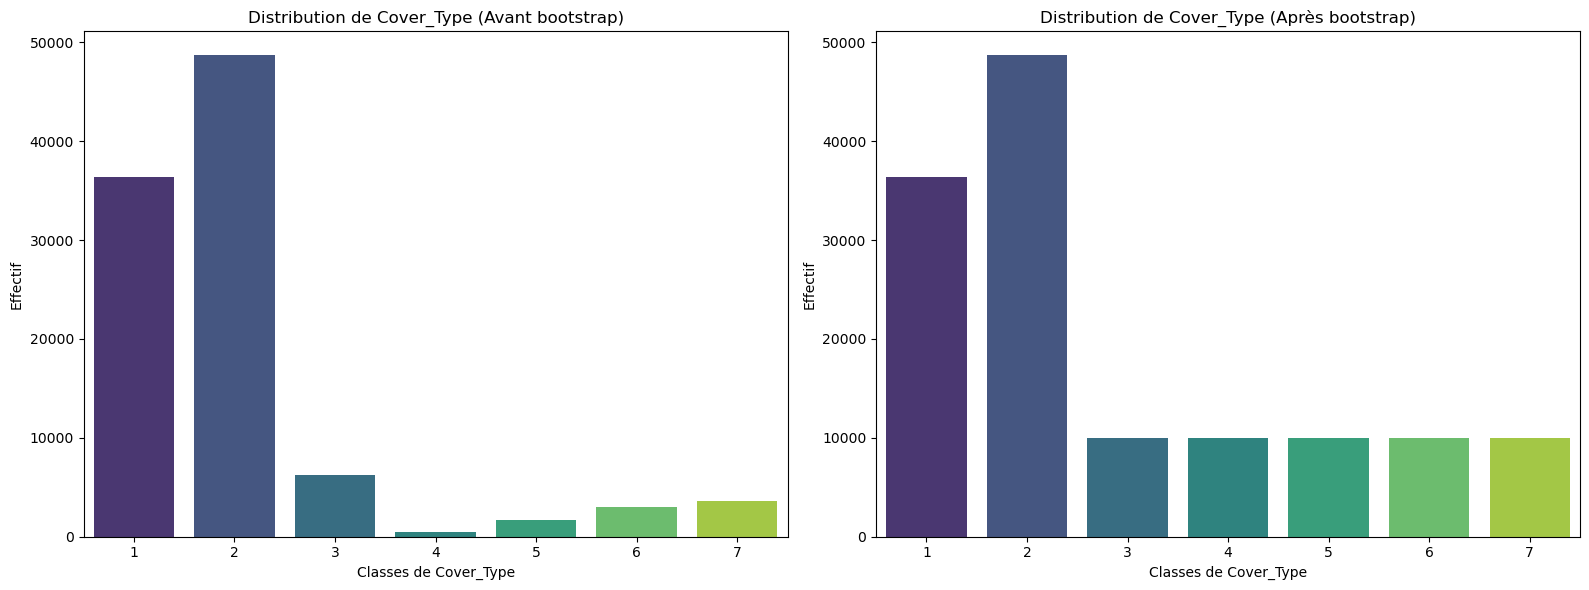

In [37]:
plt.figure(figsize=(16, 6))

# Distribution des classes avant bootstrap
plt.subplot(1, 2, 1)
sns.countplot(data=df_train, x='Cover_Type', palette='viridis')
plt.title('Distribution de Cover_Type (Avant bootstrap)')
plt.xlabel('Classes de Cover_Type')
plt.ylabel('Effectif')

# Distribution des classes après bootstrap
plt.subplot(1, 2, 2)
sns.countplot(x=df_Y_resampled, palette='viridis')
plt.title('Distribution de Cover_Type (Après bootstrap)')
plt.xlabel('Classes de Cover_Type')
plt.ylabel('Effectif')

plt.tight_layout()
plt.show()

### Choix de variables

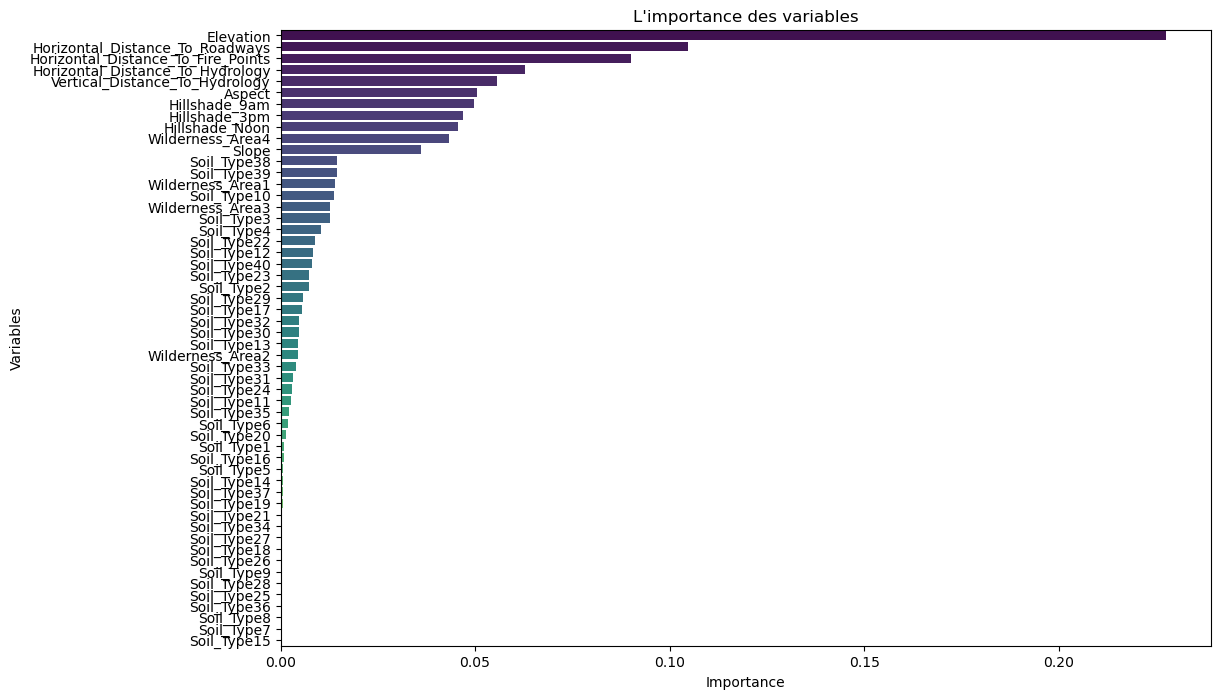

In [38]:
rf_model = RandomForestClassifier(random_state=123)
rf_model.fit(df_X_resampled, df_Y_resampled)

var_importances = rf_model.feature_importances_
var = df_X_resampled.columns

var_importances_df = pd.DataFrame({'variables': var, 'importance': var_importances}).sort_values(by='importance', 
                                                                                                 ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='variables', data=var_importances_df, palette="viridis")
plt.title("L'importance des variables")
plt.xlabel("Importance")
plt.ylabel("Variables")
plt.show()

In [39]:
importance_min = var_importances_df[var_importances_df['variables'] == 'Soil_Type3']['importance'].values[0]

var_selec = var_importances_df[var_importances_df['importance'] >= importance_min]['variables']

df_X_resampled_selected = df_X_resampled[var_selec]

print(f"Les variables sélectionnées sont : {var_selec}")

Les variables sélectionnées sont : 0                              Elevation
5        Horizontal_Distance_To_Roadways
9     Horizontal_Distance_To_Fire_Points
3       Horizontal_Distance_To_Hydrology
4         Vertical_Distance_To_Hydrology
1                                 Aspect
6                          Hillshade_9am
8                          Hillshade_3pm
7                         Hillshade_Noon
13                      Wilderness_Area4
2                                  Slope
51                           Soil_Type38
52                           Soil_Type39
10                      Wilderness_Area1
23                           Soil_Type10
12                      Wilderness_Area3
16                            Soil_Type3
Name: variables, dtype: object


### Recherche d'hyperparamètres

In [60]:
rf_model = RandomForestClassifier(random_state=123)

crossval_f1_weighted(rf_model, df_X_resampled_selected, df_Y_resampled, fold=5)

F1-score pondéré pour chaque fold: [0.93891509 0.93936279 0.93772814 0.9417406  0.93700514]
F1-score pondéré moyen: 0.9389503522473994


F1-score pondéré cv train  0.9389503522473994      |  F1-score pondéré public score 0.90760

In [113]:
# Grille d'hyperparamètres
param_distributions = {'n_estimators': [200, 500, 700],
                       'max_depth': [5,10, 15, 20,25],
                       'min_samples_split': [2, 3, 5, 10],
                       'min_samples_leaf': [1, 2, 4],
                       'max_features': ['sqrt'],
                       'class_weight': ['balanced']}

f1_weighted_scorer = make_scorer(f1_score, average="weighted")

# RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf_model,
                                   param_distributions=param_distributions,
                                   scoring=f1_weighted_scorer,
                                   cv=5,
                                   n_iter=50,
                                   n_jobs=-1,
                                   random_state=123)


random_search.fit(df_X_resampled, df_Y_resampled)

best_params = random_search.best_params_
print("Meilleurs paramètres trouvés:", best_params)

c:\Users\alexa\OneDrive\Documents\UNIVERSITE\Master2_MIA\supervisé\compétition\env\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Meilleurs paramètres trouvés: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 25, 'class_weight': 'balanced'}


### F1-Score en cross validation

In [61]:
rf_model = RandomForestClassifier(n_estimators= 500, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', 
                                  max_depth=25, class_weight= 'balanced', random_state=123)

crossval_f1_weighted(rf_model, df_X_resampled_selected, df_Y_resampled, fold = 5)

F1-score pondéré pour chaque fold: [0.93851522 0.93759123 0.93482536 0.94081461 0.93398444]
F1-score pondéré moyen: 0.9371461722908766


### F1-Score public

In [62]:
df_test_resampled_selected = df_test[var_selec]

In [63]:
predictions_df = train_and_predict(rf_model, df_X_resampled_selected, df_Y_resampled, df_test_resampled_selected)
predictions_df

,row_ID,Cover_Type
0,0,2
1,1,2
2,2,3
3,3,2
4,4,3
...,...,...
481007,481007,2
481008,481008,2
481009,481009,2
481010,481010,3


In [ ]:
# output_path = à personnaliser
predictions_df.to_csv(output_path, index=False, header=True)

#### Résultats

Paramètres : 'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 25, 'class_weight': 'balanced'

Classes avec minimum 10 000 individus

> - Jeu de données : importance de la Random forest après rééchantillonage
> - f1-score : 0.9371461722908766
> - f1-score public : 0.90640